In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001077771"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001077771
SIC,6035
Description,"SAVINGS INSTITUTION, FEDERALLY CHARTERED"
Name,UMPQUA HOLDINGS CORP
Ticker,UMPQ


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,66.0,1.657818e+01,2.872284e+00,10.3,1.516250e+01,1.698000e+01,1.823250e+01,2.136000e+01
interest income,60.0,1.416035e+08,7.751963e+07,30058000.0,9.064375e+07,1.162370e+08,2.275438e+08,2.867680e+08
net income,60.0,3.060493e+07,2.466768e+07,-10640000.0,1.332025e+07,2.162200e+07,5.298125e+07,9.098100e+07
net interest income,60.0,1.215804e+08,7.517180e+07,23123000.0,5.920500e+07,1.019345e+08,2.121232e+08,2.473900e+08
provision for loan losses,46.0,9.570065e+06,1.188386e+07,0.0,1.075000e+06,5.032000e+06,1.328200e+07,5.210800e+07


# Plots

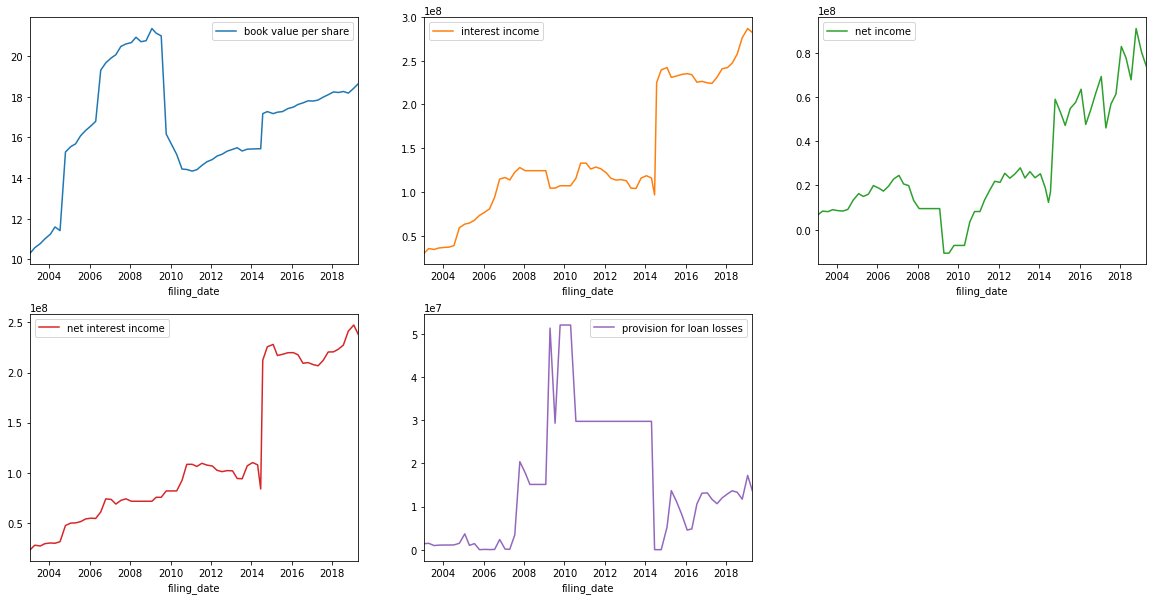

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001077771 book value per share                             2009Q4    missing   
           interest income             2008Q1 to 2008Q4: 4 periods    missing   
           interest income                                  2009Q2    missing   
           interest income             2009Q4 to 2010Q1: 2 periods    missing   
           interest income                                  2010Q4    missing   
           net income                  2008Q1 to 2008Q4: 4 periods    missing   
           net income                                       2009Q2    missing   
           net income                  2009Q4 to 2010Q1: 2 periods    missing   
           net income                                       2010Q4    missing   
           net income                                       2014Q1  duplicate   
           net interest income         2008Q1 to 2008Q4: 4 periods    missing   
           net interest income                              2009Q2    missing   
           net interest income         2009Q4 to 2010Q1: 2 periods    missing   
           net interest income                              2010Q4    missing   
           provision for loan losses   2008Q2 to 2008Q4: 3 periods    missing   
           provision for loan losses   2009Q4 to 2010Q1: 2 periods    missing   
           provision for loan losses  2010Q3 to 2013Q4: 14 periods    missing   
           provision for loan losses   2014Q2 to 2014Q3: 2 periods    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0001077771 book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()